### Отток клиентов в телекоммуникационной индустрии

Отток клиентов - это хорошо известная проблема в компаниях телекоммуникационной отрасли. 
Отток определяется как скорость, с которой клиенты прекращают вести дела с организацией.
Некоторые возможные проблемы:

Опыт работы с клиентами -> клиент может быть недоволен получаемым обслуживанием.
Ожидание клиента -> клиент, который доверяет компании, имеет определенный уровень ожидания.
Конкуренты -> возникающие конкуренты могут предложить аналогичный продукт по более низкой цене.
В результате отток повлияет на компании не только финансово, но и с точки зрения репутации.

Для компаний возможность прогнозировать отток потребителей помогает более точно прогнозировать будущие доходы.

Из-за этой возникающей проблемы многие пытались выяснить, как минимизировать коэффициент оттока, а также предсказать, какой клиент потенциально может оттокиться в будущем, на основе информации о клиентах.

Я попытаюсь определить факторы скорости оттока для одной из телекоммуникационных компаний в США. Набор данных, который я собираюсь использовать, предоставляется Kaggle - https://www.kaggle.com/mnassrib/telecom-churn-dataset .

Цели, которые должны быть достигнуты:

- Способность определить наиболее важный фактор, влияющий на отток.
- Предсказать, будут ли клиенты уходить в будущем, учитывая их ежемесячный график использования.
- Дать рекомендацию. 

### Импорт модулей

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')

### Загрузка данных

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

### Объединение датасетов

Для визуализации и анализа данных будет использоваться полный обучающий набор (train + test).
Цель: собрать более точную информацию и получить больше выборок данных 

In [4]:
df = pd.concat([train,test],ignore_index=True)

### Описание данных

- State: штат проживания клиента
- Account length: как долго клиент был участником (в месяцах)
- Area code: код города клиента
- International plan: подписывается ли клиент на международный план или нет
- Voice mail plan: подписывается ли клиент в плане голосовой почты
- Number vmail messages: сколько сообщений голосовой почты получено в месяц
- Total day minutes: сколько минут клиент звонит в дневное время (в месяц)
- Total day calls: сколько раз клиент звонил в дневное время
- Total day charge: общая дневная плата
- Total eve minutes:  сколько минут звонит клиент вечером
- Total eve calls: сколько раз клиент звонил вечером
- Total eve charge: общая вечерняя плата
- Total night minutes: сколько минут клиент звонит ночью
- Total night calls: сколько звонков сделано ночью
- Total night charge: общая ночная плата
- Total intl minutes: сколько минут клиент совершает международный звонок
- Total intl calls: сколько раз клиент совершал международные звонки
- Total intl charge: общая плата за междугородние звонки
- Customer service calls: сколько раз клиент звонил в службу поддержки
- Churn: целевая переменная. 1 для ушедшего клиента, 0 для не ушедшего 

In [5]:
df.isnull().sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
State                     3333 non-null object
Account length            3333 non-null int64
Area code                 3333 non-null int64
International plan        3333 non-null object
Voice mail plan           3333 non-null object
Number vmail messages     3333 non-null int64
Total day minutes         3333 non-null float64
Total day calls           3333 non-null int64
Total day charge          3333 non-null float64
Total eve minutes         3333 non-null float64
Total eve calls           3333 non-null int64
Total eve charge          3333 non-null float64
Total night minutes       3333 non-null float64
Total night calls         3333 non-null int64
Total night charge        3333 non-null float64
Total intl minutes        3333 non-null float64
Total intl calls          3333 non-null int64
Total intl charge         3333 non-null float64
Customer service calls    3333 non-null int64


In [44]:
df.describe()

,Account_length,Voicemail_message,Day_min,Day_call,Day_charge,Eve_min,Eve_call,Eve_charge,Night_min,Night_call,Night_charge,Intl_min,Intl_call,Intl_charge,CS_calls,Churn
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856,0.144914
std,39.822106,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491,0.352067
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000,0.000000
50%,101.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000,0.000000
75%,127.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000,0.000000
max,243.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000,1.000000


In [8]:
df.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

### Переименуем колонки
Уберем пробелы в названиях и сократим длинные названия

In [17]:
col = ['State','Account_length','Area_code','Intl_plan','Voicemail_plan','Voicemail_message','Day_min','Day_call','Day_charge','Eve_min','Eve_call','Eve_charge','Night_min','Night_call','Night_charge','Intl_min','Intl_call','Intl_charge','CS_calls','Churn']
train.columns = col
test.columns = col
df.columns = col

In [19]:
df.head()

,State,Account_length,Area_code,Intl_plan,Voicemail_plan,Voicemail_message,Day_min,Day_call,Day_charge,Eve_min,Eve_call,Eve_charge,Night_min,Night_call,Night_charge,Intl_min,Intl_call,Intl_charge,CS_calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


### Поменяем тип данных для целевой переменной

In [20]:
train['Churn'] = train['Churn'].replace({False:0,True:1})
test['Churn'] = test['Churn'].replace({False:0,True:1})
df['Churn'] = df['Churn'].replace({False:0,True:1})

### Посмотрим распределение целевой переменной

In [21]:
churn = full['Churn'].value_counts()
churn

False    2850
True      483
Name: Churn, dtype: int64

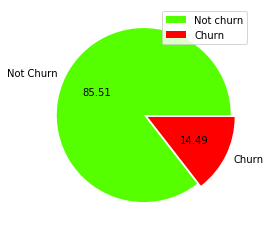

In [24]:
colors = ['#55ff00','#ff0000']
plt.pie(churn.values,labels=['Not Churn','Churn'],colors=colors,autopct='%.2f',explode=[0,0.05])
plt.legend(['Not churn','Churn'])
plt.show()

### Посмотрим категориальные признаки

In [26]:
df['Area_code'].value_counts()

415    1655
510     840
408     838
Name: Area_code, dtype: int64

In [27]:
df['State'].value_counts()

WV    106
MN     84
NY     83
AL     80
OH     78
OR     78
WI     78
WY     77
VA     77
CT     74
ID     73
VT     73
MI     73
TX     72
UT     72
IN     71
MD     70
KS     70
MT     68
NJ     68
NC     68
WA     66
CO     66
NV     66
MA     65
MS     65
RI     65
AZ     64
FL     63
MO     63
ND     62
ME     62
NM     62
OK     61
DE     61
NE     61
SD     60
SC     60
KY     59
IL     58
NH     56
AR     55
GA     54
DC     54
TN     53
HI     53
AK     52
LA     51
PA     45
IA     44
CA     34
Name: State, dtype: int64

In [28]:
df['Intl_plan'].value_counts()

No     3010
Yes     323
Name: Intl_plan, dtype: int64

In [29]:
df['Voicemail_plan'].value_counts()

No     2411
Yes     922
Name: Voicemail_plan, dtype: int64

### Анализ данных

#### Разделим числовые и категориальные признаки

In [30]:
cat = ['State','Area_code','Intl_plan','Voicemail_plan']
num = [i for i in df.columns if i not in cat and i != 'Churn']

#### Проверим данные на выбросы

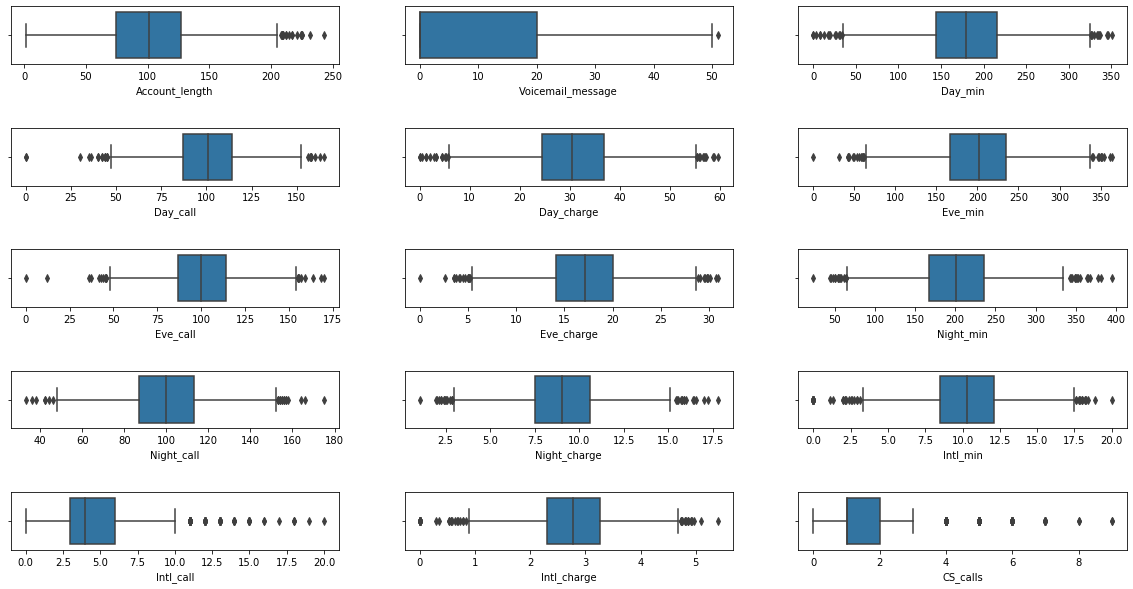

In [32]:
plt.figure(figsize=(20,10))
plt.subplots_adjust(hspace=1.1)
for i in range(len(num)):
    plt.subplot(5,3,i+1)
    sb.boxplot(df[f'{num[i]}'])

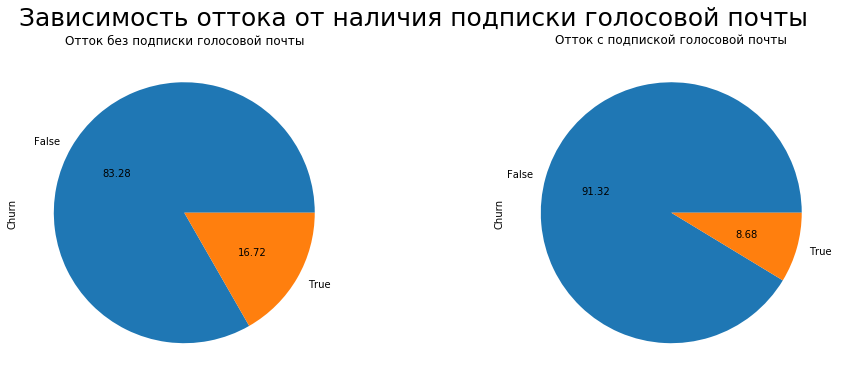

In [35]:
plt.figure(figsize=(16,6))
plt.suptitle('Зависимость оттока от наличия подписки голосовой почты',fontsize=25)
plt.subplot(121)
plt.title('Отток без подписки голосовой почты')
full[df['Voicemail_plan']=='No']['Churn'].value_counts().plot(kind='pie',autopct='%.2f')
plt.subplot(122)
plt.title('Отток с подпиской голосовой почты')
full[df['Voicemail_plan']=='Yes']['Churn'].value_counts().plot(kind='pie',autopct='%.2f')
plt.show()

Наблюдаем, что у клиентов с наличием подписки голосовой почты меньше вероятность оттока.

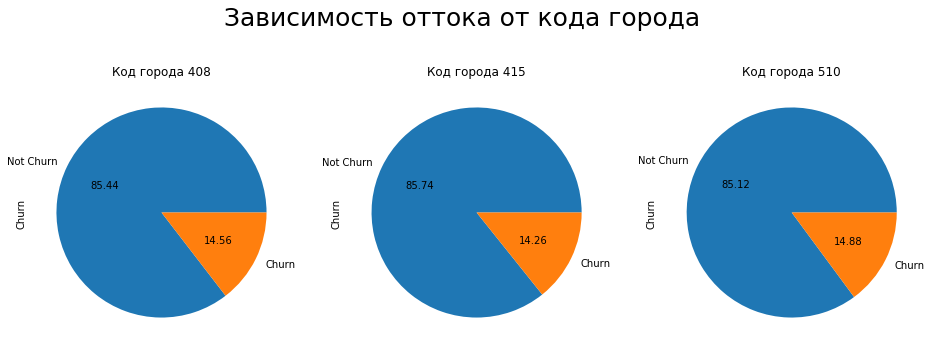

In [36]:
plt.figure(figsize=(16,6))
plt.suptitle('Зависимость оттока от кода города',fontsize=25)
plt.subplot(131)
plt.title('Код города 408')
full[df['Area_code']==408]['Churn'].value_counts().plot(kind='pie',autopct='%.2f',labels=['Not Churn','Churn'])
plt.subplot(132)
plt.title('Код города 415')
full[df['Area_code']==415]['Churn'].value_counts().plot(kind='pie',autopct='%.2f',labels=['Not Churn','Churn'])
plt.subplot(133)
plt.title('Код города 510')
full[df['Area_code']==510]['Churn'].value_counts().plot(kind='pie',autopct='%.2f',labels=['Not Churn','Churn'])
plt.show()

Наблюдаем примерно одинаковые вероятности. Соответственно эти признаки можно исключить из модели.

In [37]:
train = train.drop(columns=['Area_code'])
test = test.drop(columns=['Area_code'])
df = df.drop(columns=['Area_code'])

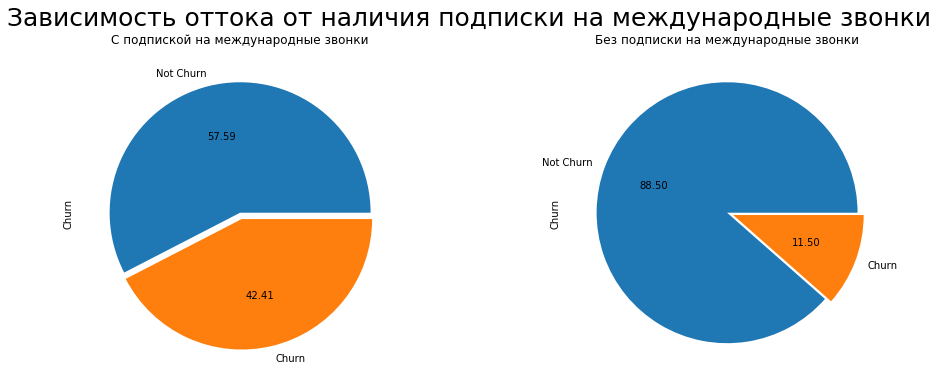

In [39]:
plt.figure(figsize=(16,6))
plt.suptitle('Зависимость оттока от наличия подписки на международные звонки',fontsize=25)
plt.subplot(121)
plt.title('С подпиской на международные звонки',fontsize=12)
full[df['Intl_plan']=='Yes']['Churn'].value_counts().plot(kind='pie',autopct='%.2f',labels=['Not Churn','Churn'],explode=[0,0.05])
plt.subplot(122)
plt.title('Без подписки на международные звонки',fontsize=12)
full[df['Intl_plan']=='No']['Churn'].value_counts().plot(kind='pie',autopct='%.2f',labels=['Not Churn','Churn'],explode=[0,0.05])
plt.show()

#### Распределение оттока по штатам

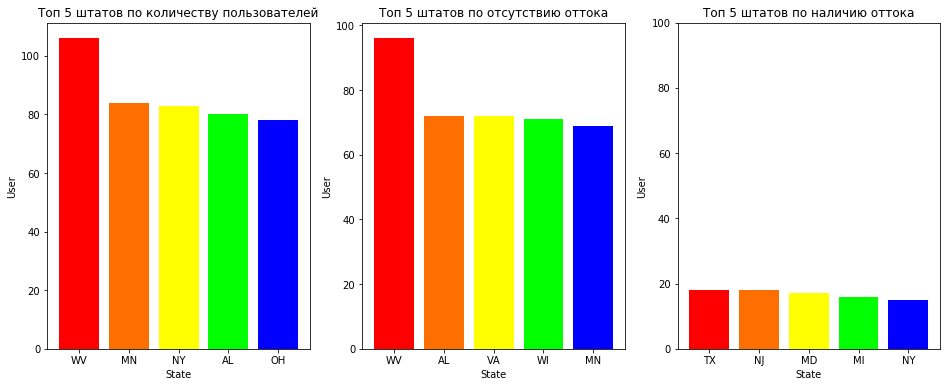

In [41]:
colors_diag = ['#ff0000','#ff6f00','#ffff00','#00ff00','#0000ff']

state_top = dict(df['State'].value_counts().head())
state_no_top = dict(df[df['Churn']==0]['State'].value_counts().head())
state_yes_top = dict(df[df['Churn']==1]['State'].value_counts().head())

plt.figure(figsize=(16,6))
plt.subplot(131)
plt.title('Топ 5 штатов по количеству пользователей')
plt.bar(state_top.keys(),state_top.values(),color=colors_diag)
plt.xlabel('State')
plt.ylabel('User')

plt.subplot(132)
plt.title('Топ 5 штатов по отсутствию оттока')
plt.bar(state_no_top.keys(),state_no_top.values(),color=colors_diag)
plt.xlabel('State')
plt.ylabel('User')

plt.subplot(133)
plt.title('Топ 5 штатов по наличию оттока')
plt.bar(state_yes_top.keys(),state_yes_top.values(),color=colors_diag)
plt.xlabel('State')
plt.ylabel('User')
plt.ylim(0,100)

plt.show()

#### Топ 5 штатов по оттоку

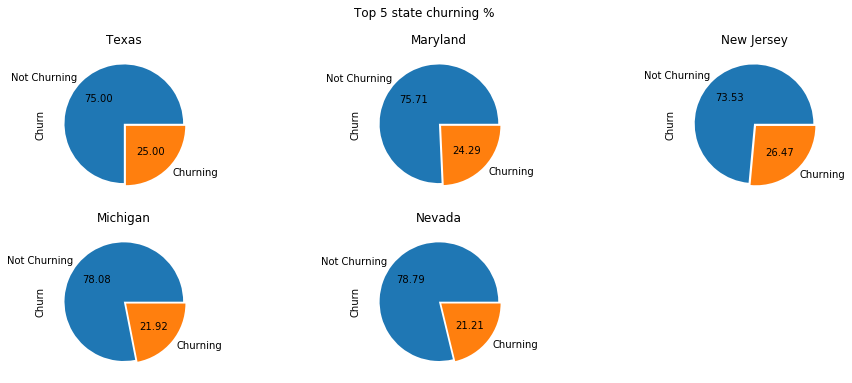

In [42]:
plt.figure(figsize=(16,6))
plt.suptitle('Top 5 state churning %')
plt.subplot(231)
plt.title('Texas')
df[df['State']=='TX']['Churn'].value_counts().plot(kind='pie',autopct='%.2f',labels=['Not Churning','Churning'],explode=[0,0.05])
plt.subplot(232)
plt.title('Maryland')
df[df['State']=='MD']['Churn'].value_counts().plot(kind='pie',autopct='%.2f',labels=['Not Churning','Churning'],explode=[0,0.05])
plt.subplot(233)
plt.title('New Jersey')
df[df['State']=='NJ']['Churn'].value_counts().plot(kind='pie',autopct='%.2f',labels=['Not Churning','Churning'],explode=[0,0.05])
plt.subplot(234)
plt.title('Michigan')
df[df['State']=='MI']['Churn'].value_counts().plot(kind='pie',autopct='%.2f',labels=['Not Churning','Churning'],explode=[0,0.05])
plt.subplot(235)
plt.title('Nevada')
df[df['State']=='NV']['Churn'].value_counts().plot(kind='pie',autopct='%.2f',labels=['Not Churning','Churning'],explode=[0,0.05])
plt.show()

Наблюдаем вероятность оттока выше среднего.

#### Средний дневной доход по штатам

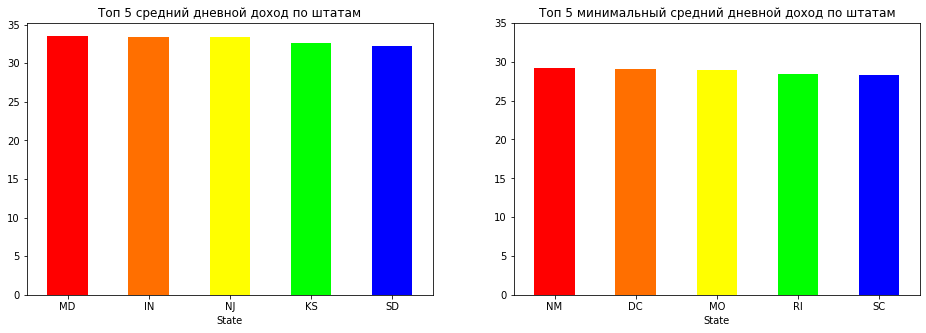

In [46]:
colors_diag = ['#ff0000','#ff6f00','#ffff00','#00ff00','#0000ff']

plt.figure(figsize=(16,5))
plt.subplot(121)
plt.title('Топ 5 средний дневной доход по штатам')
df.groupby('State')['Day_charge'].mean().sort_values(ascending=False).head(5).plot(kind='bar',color=colors_diag)
plt.xticks(rotation=0)
plt.yticks(np.arange(0,40,5))

plt.subplot(122)
plt.title('Топ 5 минимальный средний дневной доход по штатам')
df.groupby('State')['Day_charge'].mean().sort_values(ascending=False).tail(5).plot(kind='bar',color=colors_diag)
plt.xticks(rotation=0)
plt.yticks(np.arange(0,40,5))
plt.show()

#### Средний вечерний доход по штатам

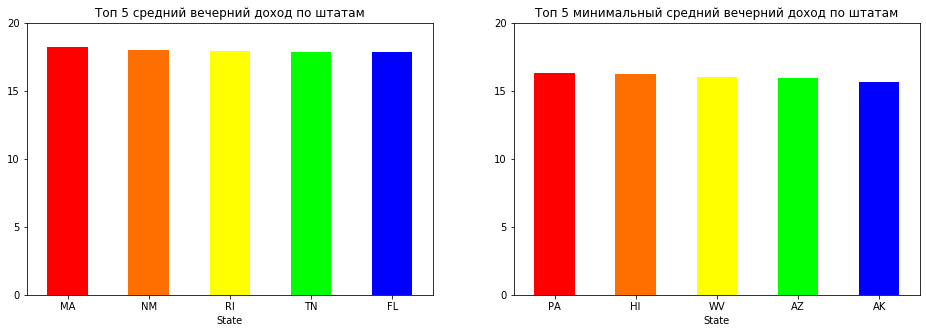

In [49]:
colors_diag = ['#ff0000','#ff6f00','#ffff00','#00ff00','#0000ff']

plt.figure(figsize=(16,5))
plt.subplot(121)
plt.title('Топ 5 средний вечерний доход по штатам')
df.groupby('State')['Eve_charge'].mean().sort_values(ascending=False).head(5).plot(kind='bar',color=colors_diag)
plt.xticks(rotation=0)
plt.yticks(np.arange(0,25,5))

plt.subplot(122)
plt.title('Топ 5 минимальный средний вечерний доход по штатам')
df.groupby('State')['Eve_charge'].mean().sort_values(ascending=False).tail(5).plot(kind='bar',color=colors_diag)
plt.xticks(rotation=0)
plt.yticks(np.arange(0,25,5))
plt.show()

#### Средний ночной доход по штатам

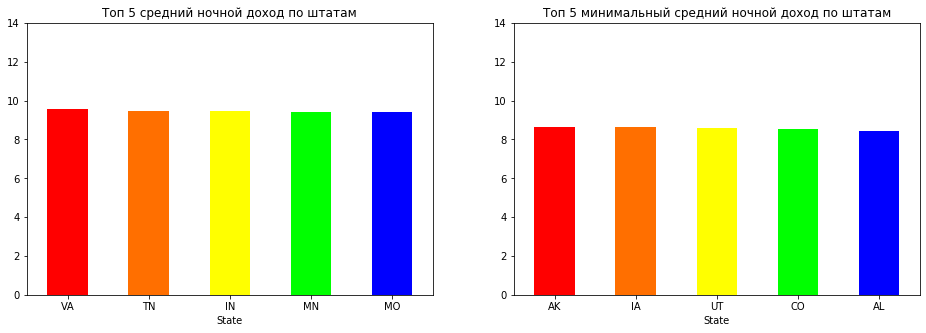

In [50]:
colors_diag = ['#ff0000','#ff6f00','#ffff00','#00ff00','#0000ff']

plt.figure(figsize=(16,5))
plt.subplot(121)
plt.title('Топ 5 средний ночной доход по штатам')
df.groupby('State')['Night_charge'].mean().sort_values(ascending=False).head(5).plot(kind='bar',color=colors_diag)
plt.xticks(rotation=0)
plt.yticks(np.arange(0,15,2))

plt.subplot(122)
plt.title('Топ 5 минимальный средний ночной доход по штатам')
df.groupby('State')['Night_charge'].mean().sort_values(ascending=False).tail(5).plot(kind='bar',color=colors_diag)
plt.xticks(rotation=0)
plt.yticks(np.arange(0,15,2))
plt.show()

#### Средний доход за международные звонки по штатам

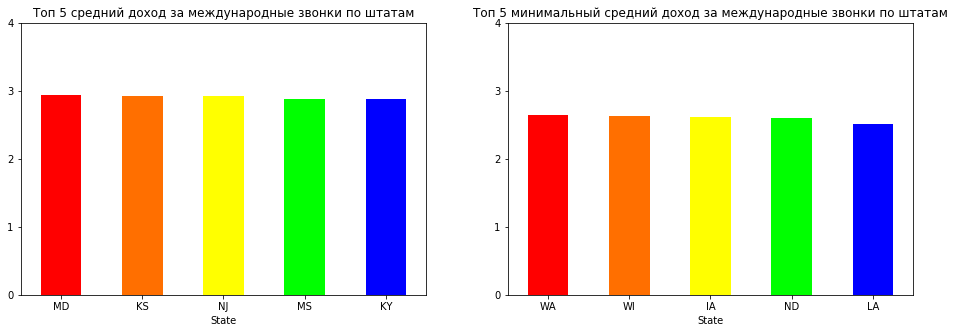

In [52]:
colors_diag = ['#ff0000','#ff6f00','#ffff00','#00ff00','#0000ff']

plt.figure(figsize=(16,5))
plt.subplot(121)
plt.title('Топ 5 средний доход за международные звонки по штатам')
df.groupby('State')['Intl_charge'].mean().sort_values(ascending=False).head(5).plot(kind='bar',color=colors_diag)
plt.xticks(rotation=0)
plt.yticks(np.arange(0,5,1))

plt.subplot(122)
plt.title('Топ 5 минимальный средний доход за международные звонки по штатам')
df.groupby('State')['Intl_charge'].mean().sort_values(ascending=False).tail(5).plot(kind='bar',color=colors_diag)
plt.xticks(rotation=0)
plt.yticks(np.arange(0,5,1))
plt.show()

#### Maryland и New Jersey лидеры по оттоку в общем топе и по доходу от международных звонков

### Посмотрим на числовые признаки

#### Корреляция признаков 

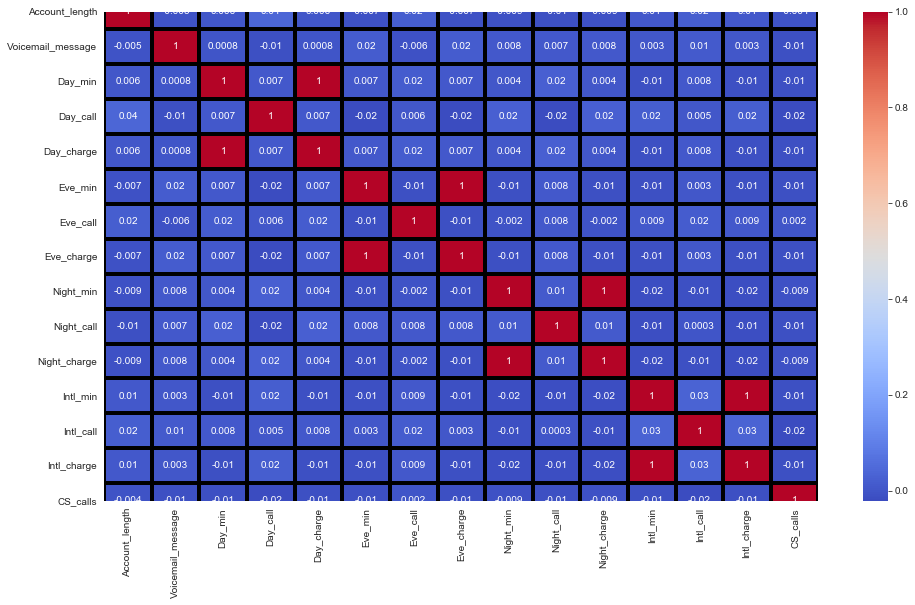

In [69]:
plt.figure(figsize=(16,9))
sb.set_style('dark')
sb.heatmap(df[num].corr(),annot=True, fmt='.1g',cmap= 'coolwarm', linewidths=3, linecolor='black')
plt.show()

##### Признаки, которые сильно коррелируют друг с другом
- Day_min и Day_charge -> 6am - 5pm
- Eve_min and Eve_charge -> 5pm - 8pm
- Night_min and Night_charge -> 8pm - 6am
- Intl_min and Intl_charge

##### Убираем их

- Day_min
- Eve_min
- Night_min
- Intl_min

In [72]:
train = train.drop(columns=['Day_min','Eve_min','Night_min','Intl_min'])
test = test.drop(columns=['Day_min','Eve_min','Night_min','Intl_min'])
df = df.drop(columns=['Day_min','Eve_min','Night_min','Intl_min'])

##### Делаем новый признак 

In [76]:
new_num = [i for i in df.columns if i not in cat]
new_cat = ['State','Intl_plan']

##### Посмотрим корреляцию после удаления признаков

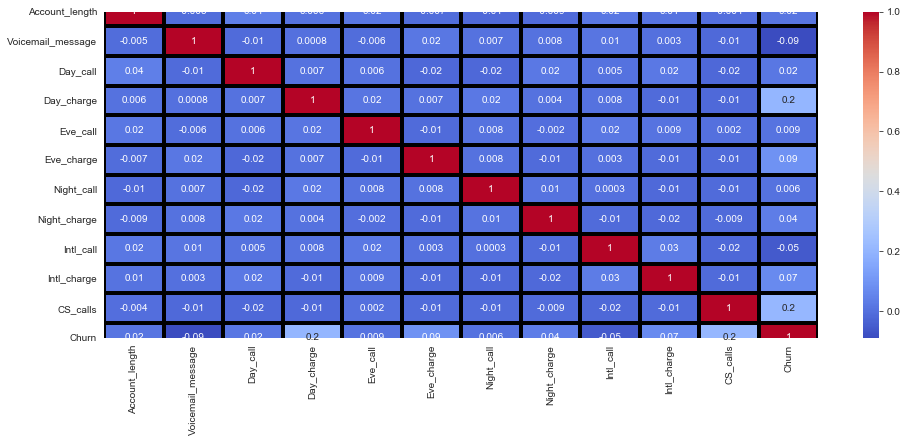

In [77]:
plt.figure(figsize=(16,6))
sb.heatmap(df[new_num].corr(),annot=True, fmt='.1g',cmap= 'coolwarm', linewidths=3, linecolor='black')
plt.show()

### Посмотрим на признаки наиболее коррелирующие с целевым признаком

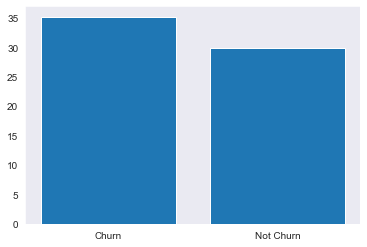

In [82]:
plt.bar(['Churn','Not Churn'],[df[df['Churn']==1]['Day_charge'].mean(),df[df['Churn']==0]['Day_charge'].mean()]);

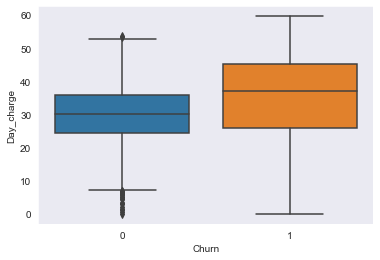

In [84]:
sb.boxplot(x='Churn',y='Day_charge',data=df);

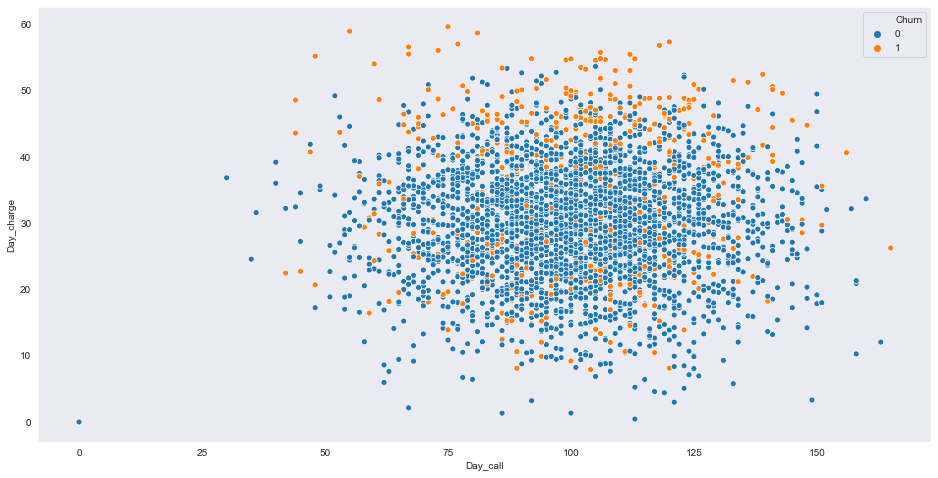

In [85]:
plt.figure(figsize=(16,8))
sb.scatterplot(x='Day_call',y='Day_charge',hue='Churn',data=df)
plt.show()

#### В среднем клиенты, которые уходят, платят больше за дневные звонки, хотя они тратят столько же звонков, что и те, кто не уходят. 

#### Посмотрим зависимость оттока от количества обращений в техподдержку

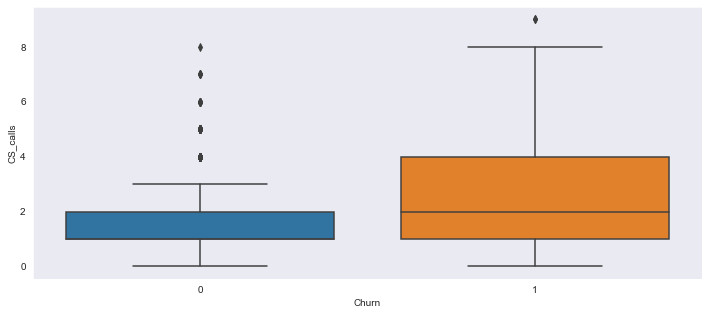

In [87]:
plt.figure(figsize=(12,5))
sb.boxplot(x='Churn',y='CS_calls',data=df)
plt.show()

#### В среднем клиенты, которые уходят, чаще звонят в техподдержку.

### Создадим бинарные признаки на основе категорильных

In [88]:
state_dummy_train = pd.get_dummies(train['State'],prefix='state')
state_dummy_test = pd.get_dummies(test['State'],prefix='state')
state_dummy_df = pd.get_dummies(df['State'],prefix='state')

In [89]:
intl_dummy_train = pd.get_dummies(train['Intl_plan'],prefix='intl')
intl_dummy_test = pd.get_dummies(test['Intl_plan'],prefix='intl')
intl_dummy_df = pd.get_dummies(df['Intl_plan'],prefix='intl')

### Добавим эти признаки к датасетам

In [90]:
new_train = pd.concat([state_dummy_train,intl_dummy_train,train[new_num]],axis=1)
new_train.head()

,state_AK,state_AL,state_AR,state_AZ,state_CA,state_CO,state_CT,state_DC,state_DE,state_FL,...,Day_call,Day_charge,Eve_call,Eve_charge,Night_call,Night_charge,Intl_call,Intl_charge,CS_calls,Churn
0,0,0,0,0,0,0,0,0,0,0,...,110,45.07,99,16.78,91,11.01,3,2.70,1,0
1,0,0,0,0,0,0,0,0,0,0,...,123,27.47,103,16.62,103,11.45,3,3.70,1,0
2,0,0,0,0,0,0,0,0,0,0,...,114,41.38,110,10.30,104,7.32,5,3.29,0,0
3,0,0,0,0,0,0,0,0,0,0,...,71,50.90,88,5.26,89,8.86,7,1.78,2,0
4,0,0,0,0,0,0,0,0,0,0,...,113,28.34,122,12.61,121,8.41,3,2.73,3,0


In [91]:
new_test = pd.concat([state_dummy_test,intl_dummy_test,test[new_num]],axis=1)
new_test.head()

,state_AK,state_AL,state_AR,state_AZ,state_CA,state_CO,state_CT,state_DC,state_DE,state_FL,...,Day_call,Day_charge,Eve_call,Eve_charge,Night_call,Night_charge,Intl_call,Intl_charge,CS_calls,Churn
0,0,0,0,0,0,0,0,0,0,0,...,97,31.37,80,29.89,90,9.71,4,2.35,1,0
1,0,0,0,0,0,0,0,0,0,0,...,137,21.95,83,19.42,111,9.40,6,3.43,4,1
2,0,0,0,0,0,0,0,0,0,0,...,67,56.59,97,27.01,128,7.23,9,1.46,4,1
3,0,0,0,0,0,0,0,0,0,0,...,103,18.77,102,11.67,105,8.53,6,2.08,2,0
4,0,0,0,0,0,0,0,0,0,0,...,117,20.28,109,18.28,90,8.04,1,3.00,1,0


In [95]:
new_df = pd.concat([state_dummy_df,intl_dummy_df,df[new_num]],axis=1)
new_df.head()

,state_AK,state_AL,state_AR,state_AZ,state_CA,state_CO,state_CT,state_DC,state_DE,state_FL,...,Day_call,Day_charge,Eve_call,Eve_charge,Night_call,Night_charge,Intl_call,Intl_charge,CS_calls,Churn
0,0,0,0,0,0,0,0,0,0,0,...,110,45.07,99,16.78,91,11.01,3,2.70,1,0
1,0,0,0,0,0,0,0,0,0,0,...,123,27.47,103,16.62,103,11.45,3,3.70,1,0
2,0,0,0,0,0,0,0,0,0,0,...,114,41.38,110,10.30,104,7.32,5,3.29,0,0
3,0,0,0,0,0,0,0,0,0,0,...,71,50.90,88,5.26,89,8.86,7,1.78,2,0
4,0,0,0,0,0,0,0,0,0,0,...,113,28.34,122,12.61,121,8.41,3,2.73,3,0


### Экспортируем трансформированные датасеты для дальнейшей работы

In [96]:
new_train.to_csv('transform_train.csv',index=False)
new_test.to_csv('transform_test.csv',index=False)
new_df.to_csv('transform_df.csv',index=False)
df.to_csv('df.csv',index=False)